**Main questions**

1. How many job offers for a given position were found?
2. What are the average salaries for individual professions?
3. In which city are there the most job offers?
4. Where is the highest rate offered?
5. What is the difference between the offer for a regular and a senior?
6. What is the lowest possible cost of employing a team consisting of a data analyst, data engineer and data scientist?
7. Is it possible to set up a team in one city? If so, where would it be the cheapest?

In [85]:
import pandas as pd 
import matplotlib.pyplot as plt


df = pd.read_csv(r"..\data\processed\job_offers_transformed.csv", sep=',', encoding='UTF-8', decimal='.')
df = df.rename(columns ={'salary_avg': 'avg_salary'})
df

,title,company,technologies,job,location,salary,min_salary,max_salary,netto,period,avg_salary,is_senior
0,Data Engineer / Snowflake Developer,ITDS Polska Sp. z o.o.,"SQL, Python, Snowflake Data Cloud",data analyst,Warszawa,23 000–31 500 zł netto (+ VAT) / mies.,23000.0,31500.0,netto,mies,27250.0,0
1,Senior Data Engineer,ITP IT PERFORMANCE sp. z o.o.,"Python, Snowflake, DBT, GitLab, SQL, Git, AWS,...",data analyst,Warszawa,125–155 zł netto (+ VAT) / godz.,21000.0,26040.0,netto,mies,23520.0,1
2,Senior Data Engineer (Azure / Databricks),GETINDATA POLAND sp. z o.o.,"Python, Scala, Java, Databricks, Kafka, Git, M...",data analyst,Warszawa,160–200 zł netto (+ VAT) / godz.,26880.0,33600.0,netto,mies,30240.0,1
3,"Senior Fullstack (Angular, Node) / BI Platform...",BYTAMIC SOLUTIONS SPÓŁKA Z OGRANICZONĄ ODPOWIE...,"Angular, TypeScript, Node.js",data analyst,Poznań,18 000–21 300 zł netto (+ VAT) / mies.,18000.0,21300.0,netto,mies,19650.0,1
4,Data Engineer,Novaris Sp. z o.o.,"Python, Microsoft Azure, Azure Data Factory, A...",data analyst,Warszawa,21 000–28 000 zł netto (+ VAT) / mies.,21000.0,28000.0,netto,mies,24500.0,0
5,Data Scientist,SQUARE ONE RESOURCES sp. z o.o.,"Python, SQL, PySpark, Azure Cloud, Databricks",data analyst,Warszawa,100–130 zł netto (+ VAT) / godz.,16800.0,21840.0,netto,mies,19320.0,0
6,Senior Data Scientist,KUBO,"Python, LLM, PyTorch / TensorFlow / Keras",data analyst,Gdańsk,100–130 zł netto (+ VAT) / godz.,16800.0,21840.0,netto,mies,19320.0,1
7,Data Analyst - Data Architect,CadEx Digital s.r.o.,"SQL, Sybase, Sybase Power Designer, 3NF",data analyst,Bratislava,15 100–19 500 zł brutto / mies.,10570.0,13650.0,netto,mies,12110.0,0
8,Senior Data Scientist,Adform Sp. z o.o.,"Python, SQL, git, Docker, C#, Java, C, C++, Scala",data analyst,Warszawa,22 400–33 600 zł netto (+ VAT) / mies.,22400.0,33600.0,netto,mies,28000.0,1
9,System - Business Analyst,Scalo Sp. z o.o.,"SQL, Kafka",data analyst,Katowice,140 zł netto (+ VAT) / godz.,23520.0,23520.0,netto,mies,23520.0,0


In [86]:
# 1. Number of job listings by job title
job_counts = df['job'].value_counts()
senior_counts = df['is_senior'].value_counts()
print(f"Number of job offers for positions: {job_counts}")
print(f"Number of senior positions: {senior_counts}")

Number of job offers for positions: job
data analyst      14
data engineer     14
data scientist    14
Name: count, dtype: int64
Number of senior positions: is_senior
0    23
1    19
Name: count, dtype: int64


In [87]:
# 2. Average salaries by job title
job_avg_salary = df['avg_salary'].groupby(df['job']).mean()
print(f"Average salaries for positions: {job_avg_salary}")
job_avg_salary_by_level = df.groupby(['job', 'is_senior'])['avg_salary'].mean()
print(f"Average salaries for positions by level: {job_avg_salary_by_level}")

Average salaries for positions: job
data analyst      22695.000000
data engineer     24364.821429
data scientist    22886.000000
Name: avg_salary, dtype: float64
Average salaries for positions by level: job             is_senior
data analyst    0            21888.888889
                1            24146.000000
data engineer   0            22424.583333
                1            25820.000000
data scientist  0            20890.500000
                1            25546.666667
Name: avg_salary, dtype: float64


In [88]:
# 3. Number of job listings by location
jobs_by_location = df['location'].value_counts()
print(jobs_by_location)

location
Warszawa      29
Wrocław        5
Bratislava     3
Poznań         2
Gdańsk         2
Katowice       1
Name: count, dtype: int64


In [89]:
# 4. Highest salary by city
highest_salary_by_city = df.groupby(['location'])['max_salary'].max().sort_values(ascending=False)
print(highest_salary_by_city)

location
Warszawa      33600.0
Wrocław       30000.0
Poznań        26880.0
Katowice      23520.0
Gdańsk        21840.0
Bratislava    13650.0
Name: max_salary, dtype: float64


In [90]:
# 5. Salary difference between regular and senior roles
salary_diff_regular_senior = df.groupby(['is_senior', 'job'])['avg_salary'].mean()
salary_diff_regular_senior

is_senior  job           
0          data analyst      21888.888889
           data engineer     22424.583333
           data scientist    20890.500000
1          data analyst      24146.000000
           data engineer     25820.000000
           data scientist    25546.666667
Name: avg_salary, dtype: float64

In [91]:
# Total difference
salary_diff_regular_senior2 = df.groupby('is_senior')['avg_salary'].mean().diff().iloc[1]
salary_diff_regular_senior2

3611.7883295194515

In [92]:
# 6. The lowest possible cost of employing a team of data analysts, data engineers and data scientists
min_salary_of_all_jobs = df.groupby(['job'])['min_salary'].min()
print(min_salary_of_all_jobs)
min_salary_of_all_jobs.sum()

job
data analyst      10570.0
data engineer     10612.0
data scientist    10570.0
Name: min_salary, dtype: float64


31752.0

In [93]:
# 7. Possibility of establishing a team in one city
jobs_per_city = df.groupby(['location']) ['job'].nunique()
cities_with_3_jobs = jobs_per_city[jobs_per_city == 3]
cities_with_3_jobs

location
Bratislava    3
Warszawa      3
Name: job, dtype: int64

In [94]:
df.query("location == 'Bratislava' | location =='Warszawa'")

,title,company,technologies,job,location,salary,min_salary,max_salary,netto,period,avg_salary,is_senior
0,Data Engineer / Snowflake Developer,ITDS Polska Sp. z o.o.,"SQL, Python, Snowflake Data Cloud",data analyst,Warszawa,23 000–31 500 zł netto (+ VAT) / mies.,23000.0,31500.0,netto,mies,27250.0,0
1,Senior Data Engineer,ITP IT PERFORMANCE sp. z o.o.,"Python, Snowflake, DBT, GitLab, SQL, Git, AWS,...",data analyst,Warszawa,125–155 zł netto (+ VAT) / godz.,21000.0,26040.0,netto,mies,23520.0,1
2,Senior Data Engineer (Azure / Databricks),GETINDATA POLAND sp. z o.o.,"Python, Scala, Java, Databricks, Kafka, Git, M...",data analyst,Warszawa,160–200 zł netto (+ VAT) / godz.,26880.0,33600.0,netto,mies,30240.0,1
4,Data Engineer,Novaris Sp. z o.o.,"Python, Microsoft Azure, Azure Data Factory, A...",data analyst,Warszawa,21 000–28 000 zł netto (+ VAT) / mies.,21000.0,28000.0,netto,mies,24500.0,0
5,Data Scientist,SQUARE ONE RESOURCES sp. z o.o.,"Python, SQL, PySpark, Azure Cloud, Databricks",data analyst,Warszawa,100–130 zł netto (+ VAT) / godz.,16800.0,21840.0,netto,mies,19320.0,0
7,Data Analyst - Data Architect,CadEx Digital s.r.o.,"SQL, Sybase, Sybase Power Designer, 3NF",data analyst,Bratislava,15 100–19 500 zł brutto / mies.,10570.0,13650.0,netto,mies,12110.0,0
8,Senior Data Scientist,Adform Sp. z o.o.,"Python, SQL, git, Docker, C#, Java, C, C++, Scala",data analyst,Warszawa,22 400–33 600 zł netto (+ VAT) / mies.,22400.0,33600.0,netto,mies,28000.0,1
10,Business Analyst,CHABRE IT SERVICES SPÓŁKA Z OGRANICZONĄ ODPOWI...,NaN,data analyst,Warszawa,150 zł netto (+ VAT) / godz.,25200.0,25200.0,netto,mies,25200.0,0
11,Business Analyst,NEONTRI SPÓŁKA Z OGRANICZONĄ ODPOWIEDZIALNOŚCI...,"BPMN, UML",data analyst,Warszawa,110–140 zł netto (+ VAT) / godz.,18480.0,23520.0,netto,mies,21000.0,0
12,Analityk Biznesowo - Systemowy,CRESTT sp. z o.o.,"UML, BPMN, Enterprise Architect, Jira, Rest, S...",data analyst,Warszawa,105–120 zł netto (+ VAT) / godz.,17640.0,20160.0,netto,mies,18900.0,0


In [95]:
cities_with_3_jobs.index

Index(['Bratislava', 'Warszawa'], dtype='object', name='location')

In [96]:
df_3_jobs_in_cities = df[df['location'].isin(cities_with_3_jobs.index)]
min_value_of_jobs = df_3_jobs_in_cities.groupby(['job', 'location'])['min_salary'].min()
cheapest_city = min_value_of_jobs.groupby(['location']).sum()
cheapest_city

location
Bratislava    31752.0
Warszawa      48200.0
Name: min_salary, dtype: float64

In [97]:
# The cheapest city to create a team of 3 positions
cheapest_city.idxmin()

'Bratislava'

In [98]:
cheapest_city.iloc[0]

31752.0

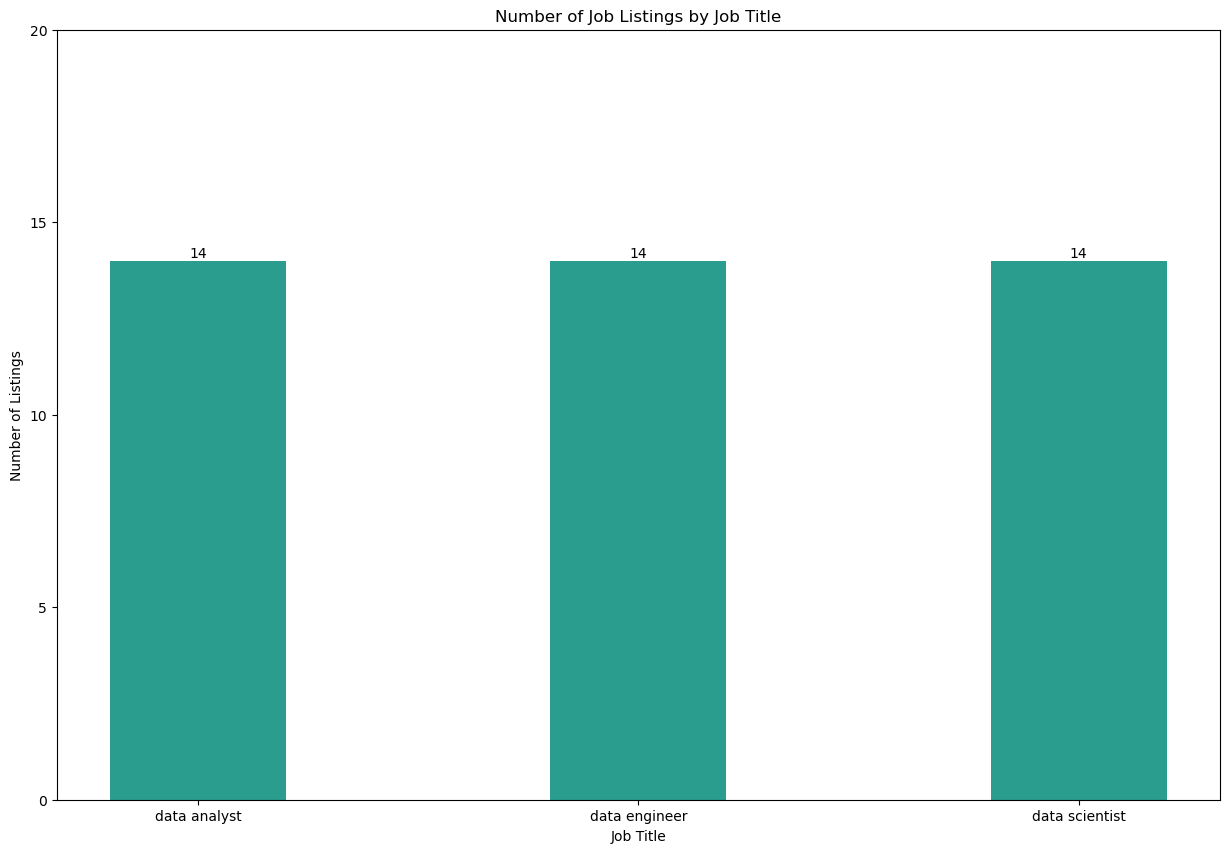

In [99]:
# Charts

color_palette = ['#2A9D8F', '#264653', '#E9C46A', '#F4A261', '#E76F51', '#8D99AE']

plt.figure(figsize=(15,10))
bars1 = plt.bar(job_counts.index, job_counts.values, width=0.4, color=color_palette[0])
plt.yticks(range(0, 21, 5))
plt.title('Number of Job Listings by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Number of Listings')

for bar in bars1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom')

plt.show()

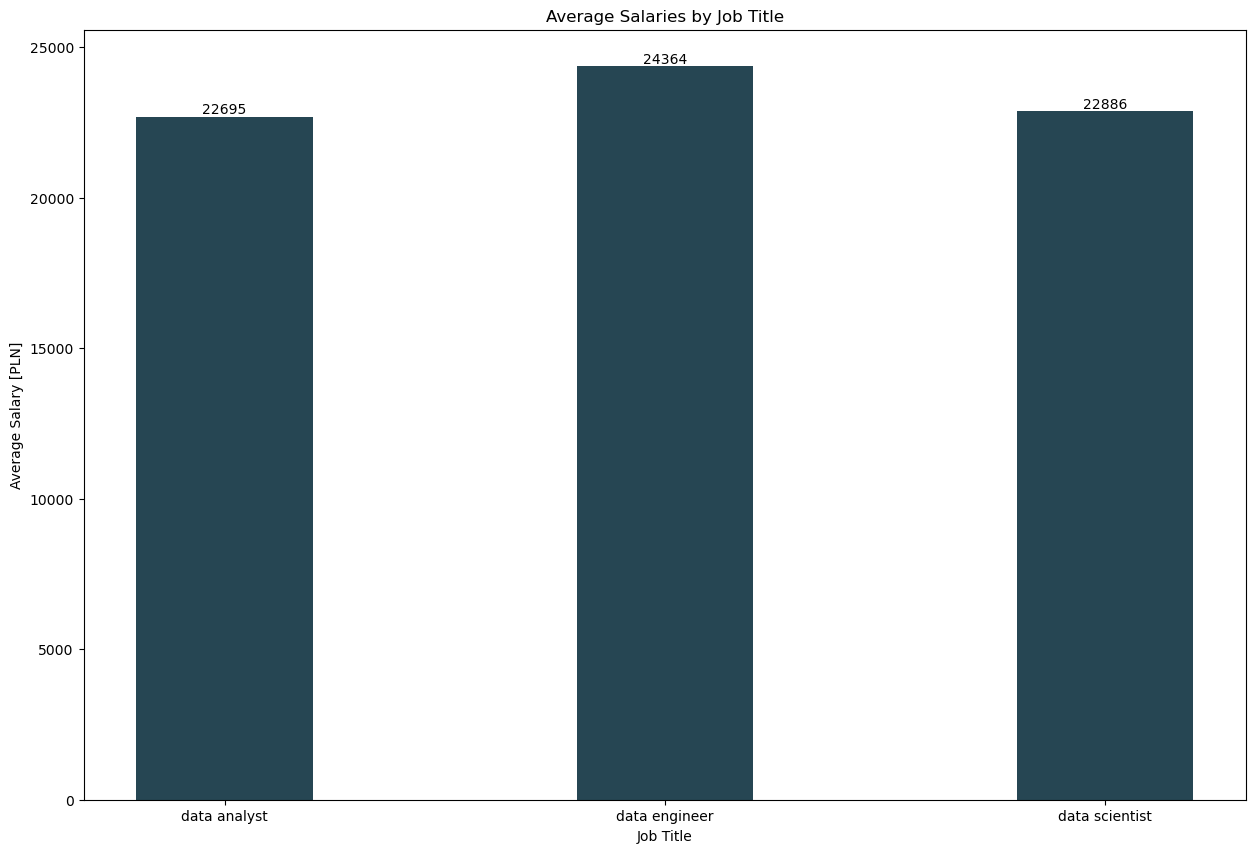

In [100]:
plt.figure(figsize=(15,10))
bars2 = plt.bar(job_avg_salary.index, job_avg_salary.values, width=0.4, color=color_palette[1])
plt.title('Average Salaries by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Average Salary [PLN]')

for bar in bars2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), int(bar.get_height()), ha='center', va='bottom')

plt.show()

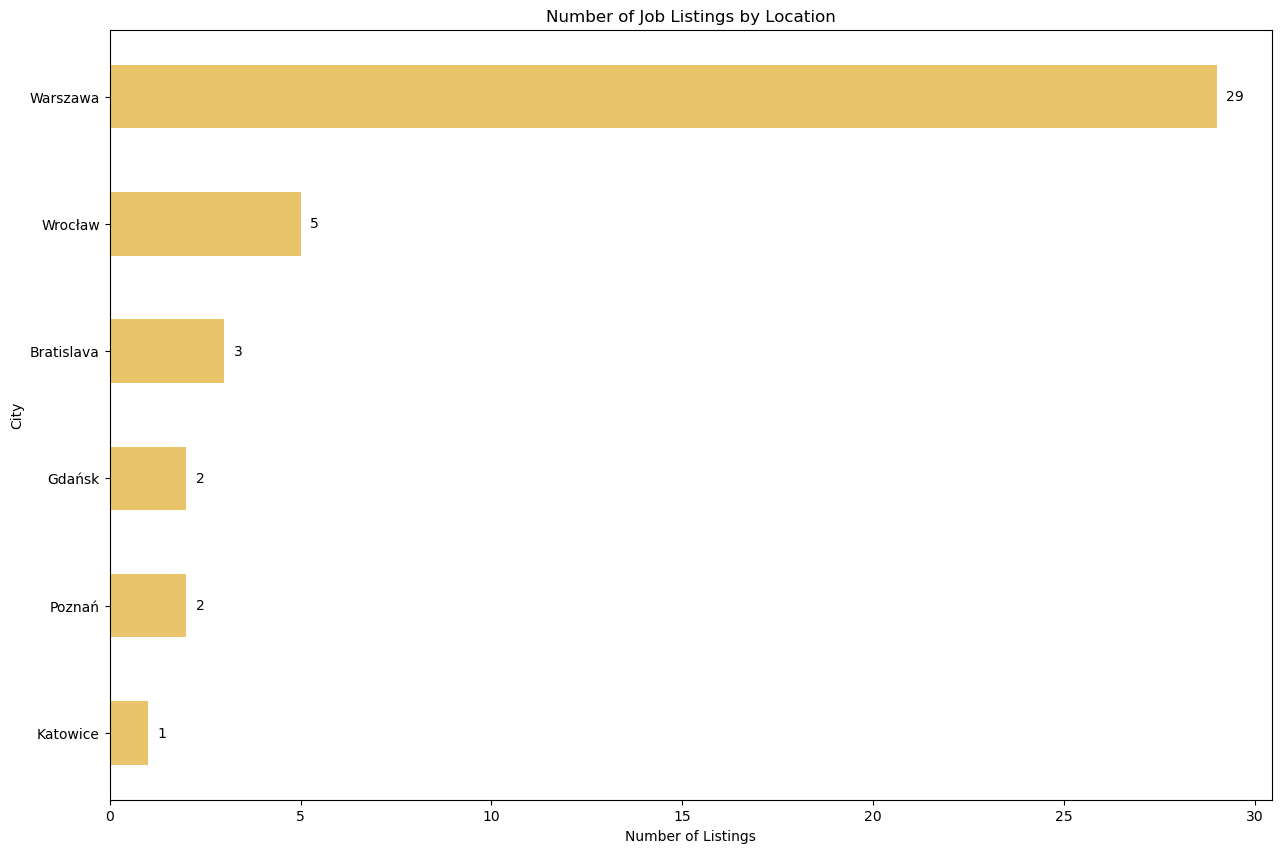

In [101]:
jobs_by_location = jobs_by_location.sort_values(ascending=True)
plt.figure(figsize=(15,10))
bars3 = plt.barh(jobs_by_location.index, jobs_by_location.values, height=0.5, color=color_palette[2])
plt.title('Number of Job Listings by Location')
plt.xlabel('Number of Listings')
plt.ylabel('City')

for bar in bars3:
    plt.text(bar.get_width() + bar.get_height()/2 , bar.get_y() + bar.get_height()/2 , int(bar.get_width()), va='center')

plt.show()

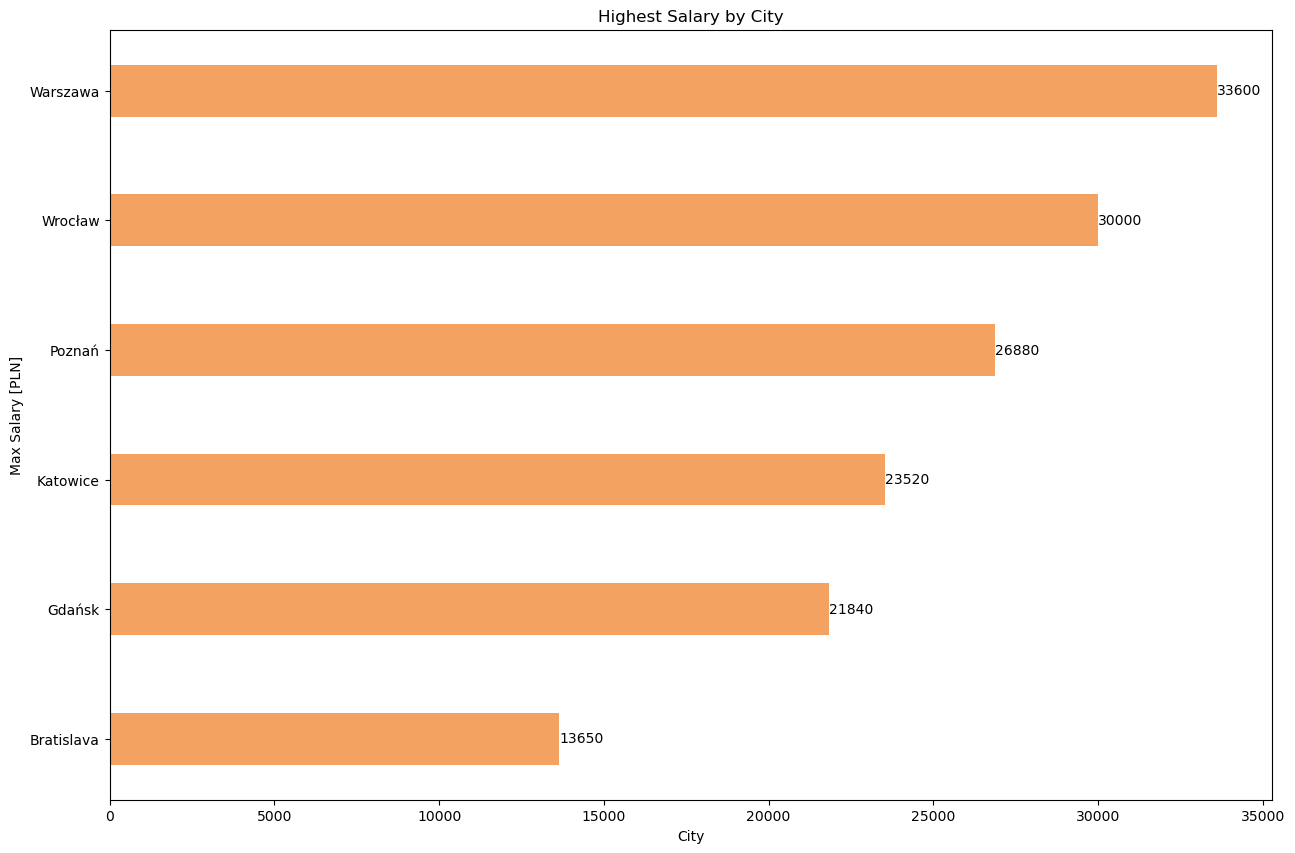

In [102]:
plt.figure(figsize=(15,10))
highest_salary_by_city = highest_salary_by_city.sort_values(ascending=True)
bars4 = plt.barh(highest_salary_by_city.index, highest_salary_by_city.values, height=0.4, color=color_palette[3])
plt.title('Highest Salary by City')
plt.xlabel('City')
plt.ylabel('Max Salary [PLN]')

for bar in bars4:
    plt.text(bar.get_width() + bar.get_height()/2 , bar.get_y() + bar.get_height()/2 , int(bar.get_width()), va='center')

plt.show()

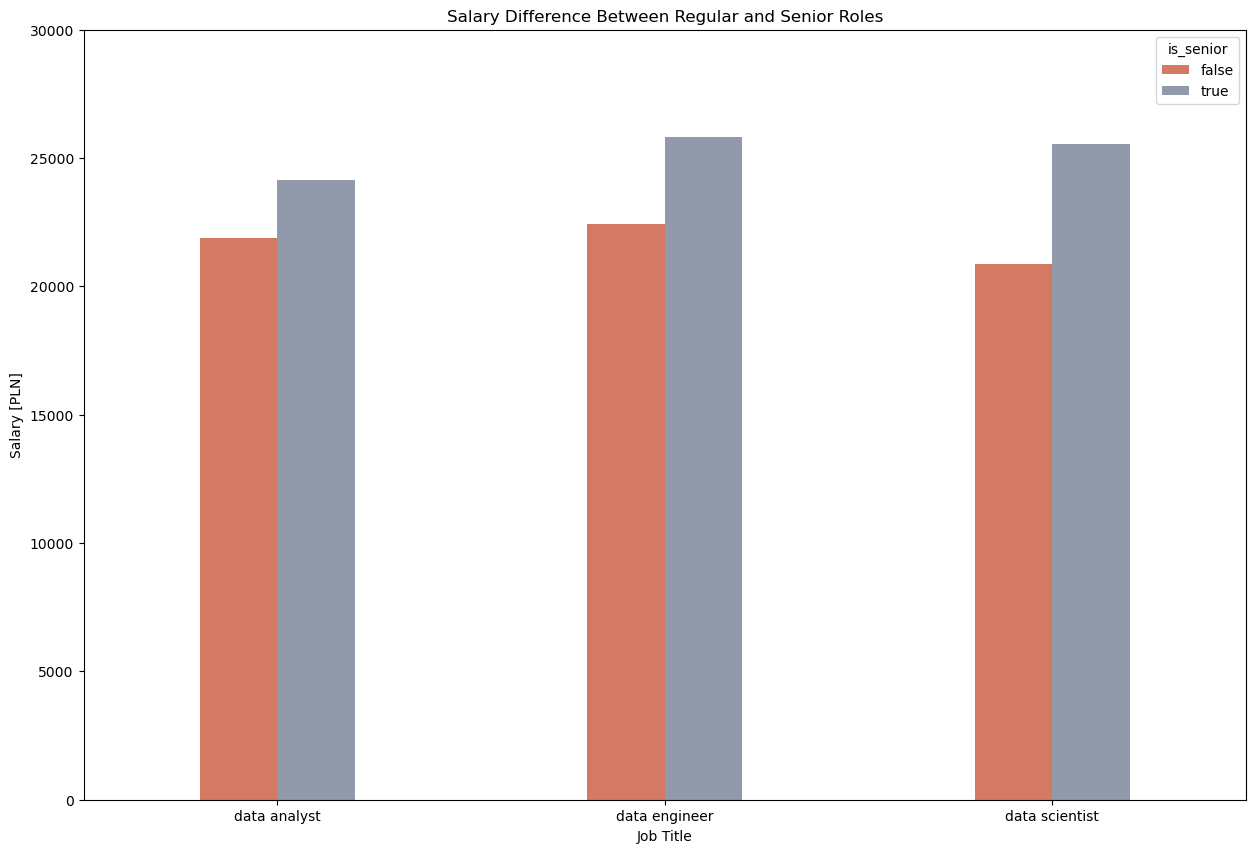

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

salary_diff_regular_senior = salary_diff_regular_senior.reset_index()
salary_diff_regular_senior['is_senior'] = salary_diff_regular_senior['is_senior'].astype(str)
salary_diff_regular_senior['is_senior'] 

salary_diff_regular_senior['is_senior'] = salary_diff_regular_senior['is_senior'].replace({'0':"false", '1':'true'})

plt.figure(figsize=(15, 10))
bars5 = sns.barplot(x="job", y="avg_salary", hue="is_senior", data=salary_diff_regular_senior, width=0.4, palette=color_palette[4:6])

plt.yticks(range(0, 31000, 5000))
plt.title("Salary Difference Between Regular and Senior Roles")
plt.xlabel("Job Title")
plt.ylabel("Salary [PLN]")

plt.show()


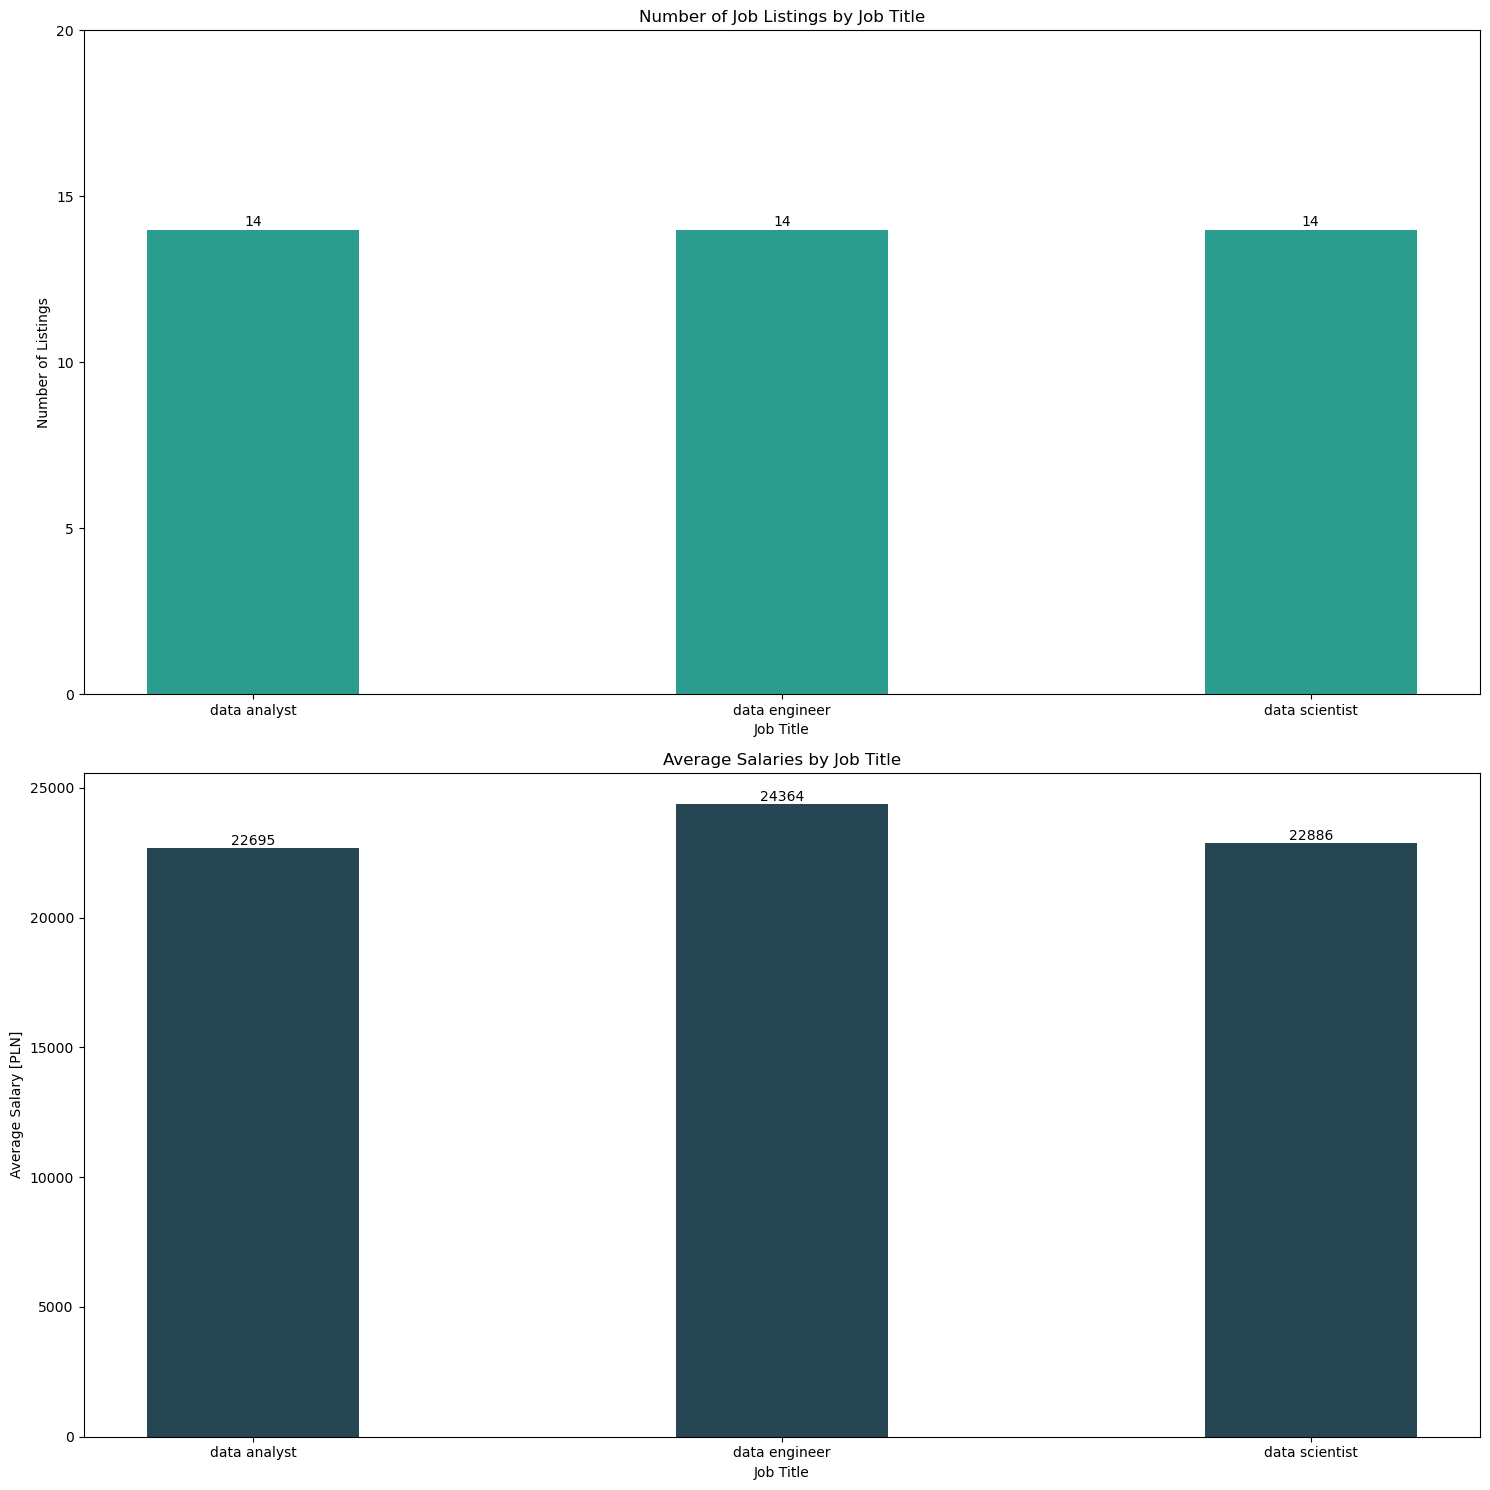

In [104]:
# Charts 1 and 2

plt.figure(figsize=(15, 15))

plt.subplot(2,1,1)
bars1 = plt.bar(job_counts.index, job_counts.values, width=0.4, color=color_palette[0])
plt.yticks(range(0, 21, 5))
plt.title('Number of Job Listings by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Number of Listings')

for bar in bars1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom')

plt.subplot(2,1,2)
bars2 = plt.bar(job_avg_salary.index, job_avg_salary.values, width=0.4, color=color_palette[1])
plt.title('Average Salaries by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Average Salary [PLN]')

for bar in bars2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), int(bar.get_height()), ha='center', va='bottom')

plt.tight_layout()
plt.show()
